<a href="https://colab.research.google.com/github/EBCotoner/Supervised-Learning/blob/master/Logistic_Regression_telcom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Coursera: 

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [0]:
# Import standard packages (pandas, numpy, matplotlib, seaborn -- pms'n)

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.metrics import confusion_matrix

In [0]:
#Load Data 

data = pd.read_csv("churn.csv")

In [4]:
#Look at Data (shape, head, tail, types --- shtt)
data.shape

#shape (rows, columns)

(7043, 21)

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
#Select features: 

columns = ['SeniorCitizen', 'tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'Contract', 'MonthlyCharges', 'Churn']
subset_data = data[columns]

subset_data.head()

,SeniorCitizen,tenure,PhoneService,InternetService,StreamingTV,Contract,MonthlyCharges,Churn
0,0,1,No,DSL,No,Month-to-month,29.85,No
1,0,34,Yes,DSL,No,One year,56.95,No
2,0,2,Yes,DSL,No,Month-to-month,53.85,Yes
3,0,45,No,DSL,No,One year,42.30,No
4,0,2,Yes,Fiber optic,No,Month-to-month,70.70,Yes


In [27]:
#Get Dummies 

subset2_data = pd.get_dummies(subset_data, prefix=['PhoneService', 'InternetService', 'StreamingTV', 'Contract','Churn'], columns=['PhoneService', 'InternetService', 'StreamingTV', 'Contract','Churn'])

subset2_data.head()

,SeniorCitizen,tenure,MonthlyCharges,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,0,1,29.85,1,0,1,0,0,1,0,0,1,0,0,1,0
1,0,34,56.95,0,1,1,0,0,1,0,0,0,1,0,1,0
2,0,2,53.85,0,1,1,0,0,1,0,0,1,0,0,0,1
3,0,45,42.30,1,0,1,0,0,1,0,0,0,1,0,1,0
4,0,2,70.70,0,1,0,1,0,1,0,0,1,0,0,0,1


In [28]:
subset2_data.dtypes

SeniorCitizen                        int64
tenure                               int64
MonthlyCharges                     float64
PhoneService_No                      uint8
PhoneService_Yes                     uint8
InternetService_DSL                  uint8
InternetService_Fiber optic          uint8
InternetService_No                   uint8
StreamingTV_No                       uint8
StreamingTV_No internet service      uint8
StreamingTV_Yes                      uint8
Contract_Month-to-month              uint8
Contract_One year                    uint8
Contract_Two year                    uint8
Churn_No                             uint8
Churn_Yes                            uint8
dtype: object

In [30]:
# Define Features
X = (subset2_data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'PhoneService_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'StreamingTV_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']])

X.head()



,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,0,1,0,0,1,0,0
1,0,34,56.95,1,1,0,0,0,1,0
2,0,2,53.85,1,1,0,0,1,0,0
3,0,45,42.30,0,1,0,0,0,1,0
4,0,2,70.70,1,0,1,0,1,0,0


In [31]:
# Set y
y = subset2_data['Churn_Yes']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: uint8

In [0]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [33]:
#PREDICTIVE ANALYSIS

# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# feature importance
log_reg.coef_

array([[ 0.32752067, -0.03152523,  0.01368266, -0.78202211,  0.08626828,
         0.90551596,  0.15992788,  0.5782141 , -0.3423845 , -1.32363687]])

In [35]:
#Metrics

# accuracy
acc

0.8097941802696949

In [37]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[1856,  213],
       [ 323,  426]])

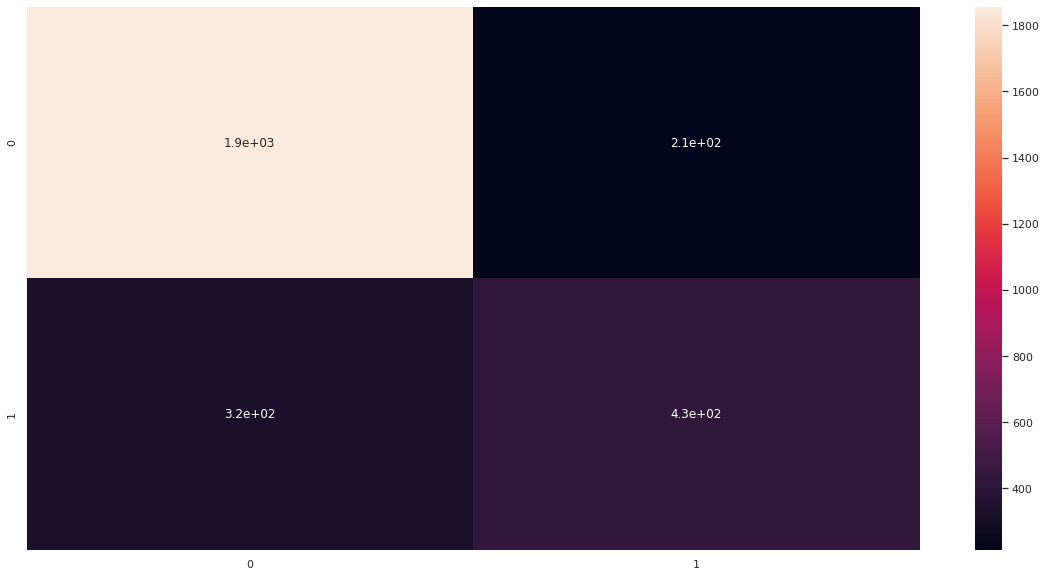

In [38]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [39]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
# Describe why the 
test_data[test_data['predictions']==0].describe()

,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,predictions
count,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.0
mean,0.116567,38.450665,59.206884,0.881138,0.426342,0.299679,0.346948,0.434603,0.257916,0.307480,0.0
std,0.320978,24.211092,31.039324,0.323700,0.494658,0.458222,0.476108,0.495819,0.437588,0.461556,0.0
min,0.000000,0.000000,18.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,16.000000,24.825000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,40.000000,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,61.000000,85.325000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [41]:
test_data[test_data['predictions']==1].describe()

,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,predictions
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.0,639.0
mean,0.330203,10.893584,83.657512,0.957746,0.043818,0.956182,0.486698,0.998435,0.001565,0.0,1.0
std,0.470655,10.063183,14.256802,0.201325,0.204851,0.204851,0.500215,0.039559,0.039559,0.0,0.0
min,0.000000,1.000000,24.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.000000,2.000000,74.950000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0
50%,0.000000,7.000000,84.800000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0
75%,1.000000,17.000000,94.525000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.0
max,1.000000,46.000000,113.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


OBSERVATIONS: 

churners have: 
1. shorter tenure 
2. higher monthly charges 
3. fiber optic internet service
4. month-to-month contracts 

NO SIGNIFICANT EFFECT: 
1. Phone Service_Yes
2. Internet Service DSL
3. StreamingTV_Yes

RECOMMENDATIONS: 
1. Consider 3-month contracts to replace 1 month contracts 
2. Offer promos to get one-month contract subscribers to upgrade 
3. Improve fiber optic service
4. offer rebates to decrease bills 
